# Analyzing Baseball Statistics

Objective of this analysis is to explore some of the baseball statistics datasets from [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), and answer some interesting questions.

Specifically, we will be analyzing the 2014 datasets, that can be found [here]( http://seanlahman.com/files/database/lahman-csv_2015-01-24.zip).

These are some questions I have come up with:

* What is the age distribution of MLB players who played during the 2014 season? Does the age distribution change based on the position they played?


* Do right hand pitchers perform better than left hand pitchers - higher strikeouts per 9 innings, lower walks and hits per 9 innings, higher win-loss ratio?


* How many total homeruns were made every season? Who were the top five players with the most number of homeruns in any given season?


* List the top ten currently active franchises with the highest average win percentage per season, or the most number of world series wins? Is there a correlation between a franchises' average win percentage and the number of world series they've won?


* What is the correlation between the batting average, on base percentage (OBP), runs batted in (RBI) and homeruns of a batter to his salary? Which of these is more positively correlated?

## Setting up the environment and loading the datasets

In [12]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [13]:
# Loading 'Master.csv' file into a master_df dataframe and exploring it
def load_df(csv):
    return pd.read_csv(csv)

def explore_df(df):
    print('(Rows, Columns) : {}'.format(df.shape))
    print('\nFirst five rows:\n')
    print(df.head())
    print('\nColumn names and their data types:\n')
    print(df.dtypes)
    return

master_df = load_df('Datasets/Master.csv')
explore_df(master_df)

(Rows, Columns) : (18589, 24)

First five rows:

    playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0  aardsda01     1981.0        12.0      27.0          USA         CO   
1  aaronha01     1934.0         2.0       5.0          USA         AL   
2  aaronto01     1939.0         8.0       5.0          USA         AL   
3   aasedo01     1954.0         9.0       8.0          USA         CA   
4   abadan01     1972.0         8.0      25.0          USA         FL   

    birthCity  deathYear  deathMonth  deathDay    ...     nameLast  \
0      Denver        NaN         NaN       NaN    ...      Aardsma   
1      Mobile        NaN         NaN       NaN    ...        Aaron   
2      Mobile     1984.0         8.0      16.0    ...        Aaron   
3      Orange        NaN         NaN       NaN    ...         Aase   
4  Palm Beach        NaN         NaN       NaN    ...         Abad   

        nameGiven weight height bats throws      debut  finalGame   retroID  \
0     David 

In [14]:
# Loading 'Appearances.csv' file into a appearances_df dataframe and exploring it
appearances_df = load_df('Datasets/Appearances.csv')
explore_df(appearances_df)

(Rows, Columns) : (99466, 21)

First five rows:

   yearID teamID lgID   playerID  G_all  GS  G_batting  G_defense  G_p  G_c  \
0    1871    BS1  NaN  barnero01   31.0 NaN         31       31.0    0    0   
1    1871    BS1  NaN  barrofr01   18.0 NaN         18       18.0    0    0   
2    1871    BS1  NaN  birdsda01   29.0 NaN         29       29.0    0    7   
3    1871    BS1  NaN   conefr01   19.0 NaN         19       19.0    0    0   
4    1871    BS1  NaN  gouldch01   31.0 NaN         31       31.0    0    0   

   ...   G_2b  G_3b  G_ss  G_lf  G_cf  G_rf  G_of  G_dh  G_ph  G_pr  
0  ...     16     0    15     0     0     0     0   NaN   NaN   NaN  
1  ...      1     0     0    13     0     4    17   NaN   NaN   NaN  
2  ...      0     0     0     0     0    27    27   NaN   NaN   NaN  
3  ...      0     0     0    18     0     1    18   NaN   NaN   NaN  
4  ...      0     0     0     0     0     1     1   NaN   NaN   NaN  

[5 rows x 21 columns]

Column names and their data type

In [15]:
# Loading 'Pitching.csv' file into a pitching_df dataframe and exploring it
pitching_df = load_df('Datasets/Pitching.csv')
explore_df(pitching_df)

(Rows, Columns) : (43330, 30)

First five rows:

    playerID  yearID  stint teamID lgID   W   L   G  GS  CG  ...   IBB  WP  \
0  bechtge01    1871      1    PH1  NaN   1   2   3   3   2  ...   NaN NaN   
1  brainas01    1871      1    WS3  NaN  12  15  30  30  30  ...   NaN NaN   
2  fergubo01    1871      1    NY2  NaN   0   0   1   0   0  ...   NaN NaN   
3  fishech01    1871      1    RC1  NaN   4  16  24  24  22  ...   NaN NaN   
4  fleetfr01    1871      1    NY2  NaN   0   1   1   1   1  ...   NaN NaN   

   HBP  BK  BFP  GF    R  SH  SF  GIDP  
0  NaN   0  NaN NaN   42 NaN NaN   NaN  
1  NaN   0  NaN NaN  292 NaN NaN   NaN  
2  NaN   0  NaN NaN    9 NaN NaN   NaN  
3  NaN   0  NaN NaN  257 NaN NaN   NaN  
4  NaN   0  NaN NaN   21 NaN NaN   NaN  

[5 rows x 30 columns]

Column names and their data types:

playerID     object
yearID        int64
stint         int64
teamID       object
lgID         object
W             int64
L             int64
G             int64
GS            in

In [16]:
# Loading 'Batting.csv' file into a batting_df dataframe and exploring it
batting_df = load_df('Datasets/Batting.csv')
explore_df(batting_df)

(Rows, Columns) : (99846, 22)

First five rows:

    playerID  yearID  stint teamID lgID   G     AB     R     H    2B  ...   \
0  abercda01    1871      1    TRO  NaN   1    4.0   0.0   0.0   0.0  ...    
1   addybo01    1871      1    RC1  NaN  25  118.0  30.0  32.0   6.0  ...    
2  allisar01    1871      1    CL1  NaN  29  137.0  28.0  40.0   4.0  ...    
3  allisdo01    1871      1    WS3  NaN  27  133.0  28.0  44.0  10.0  ...    
4  ansonca01    1871      1    RC1  NaN  25  120.0  29.0  39.0  11.0  ...    

    RBI   SB   CS   BB   SO  IBB  HBP  SH  SF  GIDP  
0   0.0  0.0  0.0  0.0  0.0  NaN  NaN NaN NaN   NaN  
1  13.0  8.0  1.0  4.0  0.0  NaN  NaN NaN NaN   NaN  
2  19.0  3.0  1.0  2.0  5.0  NaN  NaN NaN NaN   NaN  
3  27.0  1.0  1.0  0.0  2.0  NaN  NaN NaN NaN   NaN  
4  16.0  6.0  2.0  2.0  1.0  NaN  NaN NaN NaN   NaN  

[5 rows x 22 columns]

Column names and their data types:

playerID     object
yearID        int64
stint         int64
teamID       object
lgID         objec

In [17]:
# Loading 'Teams.csv' file into a teams_df dataframe and exploring it
teams_df = load_df('Datasets/Teams.csv')
explore_df(teams_df)

(Rows, Columns) : (2775, 48)

First five rows:

   yearID lgID teamID franchID divID  Rank   G  Ghome   W   L     ...       \
0    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10     ...        
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9     ...        
2    1871  NaN    CL1      CFC   NaN     8  29    NaN  10  19     ...        
3    1871  NaN    FW1      KEK   NaN     7  19    NaN   7  12     ...        
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17     ...        

   DP    FP                     name                          park  \
0 NaN  0.83     Boston Red Stockings           South End Grounds I   
1 NaN  0.82  Chicago White Stockings       Union Base-Ball Grounds   
2 NaN  0.81   Cleveland Forest Citys  National Association Grounds   
3 NaN  0.80     Fort Wayne Kekiongas                Hamilton Field   
4 NaN  0.83         New York Mutuals      Union Grounds (Brooklyn)   

   attendance  BPF  PPF  teamIDBR  teamIDlahman45  teamIDretro

In [18]:
# Loading 'Teams.csv' file into a teams_df dataframe and exploring it
franchises_df = load_df('Datasets/TeamsFranchises.csv')
explore_df(franchises_df)

(Rows, Columns) : (120, 4)

First five rows:

  franchID                     franchName active NAassoc
0      ALT          Altoona Mountain City      N     NaN
1      ANA  Los Angeles Angels of Anaheim      Y     NaN
2      ARI           Arizona Diamondbacks      Y     NaN
3      ATH         Philadelphia Athletics      N     PNA
4      ATL                 Atlanta Braves      Y     BNA

Column names and their data types:

franchID      object
franchName    object
active        object
NAassoc       object
dtype: object


In [19]:
# Loading 'Salaries.csv' file into a salaries_df dataframe and exploring it
salaries_df = load_df('Datasets/Salaries.csv')
explore_df(salaries_df)

(Rows, Columns) : (24758, 5)

First five rows:

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000

Column names and their data types:

yearID       int64
teamID      object
lgID        object
playerID    object
salary       int64
dtype: object


## Cleaning up the data for analysis

In [20]:
# Merging required columns from master_df and appearances_df, and filtering to yearID 2014 to answer question 1
curr_age_pos = (master_df.loc[:,['playerID','birthYear','birthMonth','birthDay','finalGame']].merge \
(appearances_df.loc[:,['yearID','playerID','G_p','G_c','G_1b','G_2b','G_3b','G_ss','G_lf','G_cf','G_rf','G_dh', \
                       'G_ph', 'G_pr']], on='playerID', how='inner'))
curr_age_pos = curr_age_pos[curr_age_pos['yearID']==2014].reset_index(drop=True)
curr_age_pos.head()

,playerID,birthYear,birthMonth,birthDay,finalGame,yearID,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_dh,G_ph,G_pr
0,abadfe01,1985.0,12.0,17.0,9/27/2014,2014,69,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,abreubo01,1974.0,3.0,11.0,9/28/2014,2014,0,0,0,0,0,0,5,0,26,3.0,46.0,0.0
2,abreujo02,1987.0,1.0,29.0,9/27/2014,2014,0,0,109,0,0,0,0,0,0,35.0,1.0,0.0
3,abreuto01,1984.0,11.0,13.0,7/28/2014,2014,0,0,0,1,1,0,0,0,0,0.0,1.0,0.0
4,aceveal01,1982.0,12.0,8.0,6/2/2014,2014,10,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [21]:
# previewing first 5 rows and checking for missing values in curr_age_pos df
def head_isnull(df):
    display(df.head())
    display(df.isnull().sum())
    return

head_isnull(curr_age_pos)

,playerID,birthYear,birthMonth,birthDay,finalGame,yearID,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_dh,G_ph,G_pr
0,abadfe01,1985.0,12.0,17.0,9/27/2014,2014,69,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,abreubo01,1974.0,3.0,11.0,9/28/2014,2014,0,0,0,0,0,0,5,0,26,3.0,46.0,0.0
2,abreujo02,1987.0,1.0,29.0,9/27/2014,2014,0,0,109,0,0,0,0,0,0,35.0,1.0,0.0
3,abreuto01,1984.0,11.0,13.0,7/28/2014,2014,0,0,0,1,1,0,0,0,0,0.0,1.0,0.0
4,aceveal01,1982.0,12.0,8.0,6/2/2014,2014,10,0,0,0,0,0,0,0,0,0.0,0.0,0.0


playerID      0
birthYear     0
birthMonth    0
birthDay      0
finalGame     0
yearID        0
G_p           0
G_c           0
G_1b          0
G_2b          0
G_3b          0
G_ss          0
G_lf          0
G_cf          0
G_rf          0
G_dh          0
G_ph          0
G_pr          0
dtype: int64

In [22]:
# Converting birth year, month, day to int and creating birth date column as a datetime type in curr_age_pos df
birth_date_df = pd.DataFrame()
birth_date_df['year'] = curr_age_pos['birthYear'].astype('int')
birth_date_df['month'] = curr_age_pos['birthMonth'].astype('int')
birth_date_df['day'] = curr_age_pos['birthDay'].astype('int')
curr_age_pos['birthDate'] = pd.to_datetime(birth_date_df)
curr_age_pos = curr_age_pos.drop(['birthYear','birthMonth','birthDay'], axis='columns')

# Converting final Game to datetime type in curr_age_pos df
curr_age_pos['finalGame'] = pd.to_datetime(curr_age_pos['finalGame'],format='%m/%d/%Y')

In [23]:
# checking curr_age_pos df data types
curr_age_pos.dtypes

playerID             object
finalGame    datetime64[ns]
yearID                int64
G_p                   int64
G_c                   int64
G_1b                  int64
G_2b                  int64
G_3b                  int64
G_ss                  int64
G_lf                  int64
G_cf                  int64
G_rf                  int64
G_dh                float64
G_ph                float64
G_pr                float64
birthDate    datetime64[ns]
dtype: object

In [24]:
# Merging required columns from master_df and pitching_df to answer question 2
pitch_hand_perf = master_df.loc[:,['playerID','throws']].merge \
(pitching_df.loc[:,['playerID','W','L','IPouts','H','BB','SO']], on='playerID', how='inner')

In [25]:
# previewing first 5 rows and checking for missing values in pitch_hand_perf df
head_isnull(pitch_hand_perf)

,playerID,throws,W,L,IPouts,H,BB,SO
0,aardsda01,R,1,0,32.0,20,10,5
1,aardsda01,R,3,0,159.0,41,28,49
2,aardsda01,R,2,1,97.0,39,17,36
3,aardsda01,R,4,2,146.0,49,35,49
4,aardsda01,R,3,6,214.0,49,34,80


playerID      0
throws      339
W             0
L             0
IPouts        1
H             0
BB            0
SO            0
dtype: int64

In [26]:
# checking the no. of rows in pitch_hand_perf df
pitch_hand_perf.shape[0]

43330

In [27]:
# dropping all rows with missing values in the throws column in pitch_hand_perf df
pitch_hand_perf = pitch_hand_perf.dropna()
pitch_hand_perf.shape[0]

42990

In [28]:
# Converting Outs Pitched from float to int in pitch_hand_perf df
pitch_hand_perf['IPouts'] = pitch_hand_perf['IPouts'].astype('int')
pitch_hand_perf['IPouts'].dtype

dtype('int64')

In [29]:
# dropping column playerID from pitch_hand_perf df
pitch_hand_perf = pitch_hand_perf.drop('playerID', axis='columns')
pitch_hand_perf.head()

,throws,W,L,IPouts,H,BB,SO
0,R,1,0,32,20,10,5
1,R,3,0,159,41,28,49
2,R,2,1,97,39,17,36
3,R,4,2,146,49,35,49
4,R,3,6,214,49,34,80


In [30]:
# Merging required columns from master_df and batting_df to answer question 3
homeruns = master_df.loc[:,['playerID','nameFirst','nameLast','nameGiven']].merge \
(batting_df.loc[:,['playerID','yearID','HR']], on='playerID', how='inner')

In [31]:
# previewing first 5 rows and checking for missing values in homeruns df
head_isnull(homeruns)

,playerID,nameFirst,nameLast,nameGiven,yearID,HR
0,aardsda01,David,Aardsma,David Allan,2004,0.0
1,aardsda01,David,Aardsma,David Allan,2006,0.0
2,aardsda01,David,Aardsma,David Allan,2007,0.0
3,aardsda01,David,Aardsma,David Allan,2008,0.0
4,aardsda01,David,Aardsma,David Allan,2009,0.0


playerID        0
nameFirst      41
nameLast        0
nameGiven      41
yearID          0
HR           5149
dtype: int64

In [32]:
# checking the no. of rows in the homeruns df
homeruns.shape[0]

99846

In [33]:
# dropping all rows with missing values in the homeruns df
homeruns = homeruns.dropna()
homeruns.shape[0]

94656

In [34]:
# Converting Home Runs from float to int
homeruns['HR'] = homeruns['HR'].astype('int')
homeruns['HR'].dtype

dtype('int64')

In [35]:
# Merging teams_df and franchises_df, this new df will be used to answer question 4
teams_franchises = teams_df.loc[:,['yearID','G','W','WSWin','franchID']]. \
merge(franchises_df[franchises_df['active']=='Y'].loc[:,['franchID','franchName']],on='franchID',how='inner')
teams_franchises = teams_franchises.drop('franchID',axis='columns')

In [36]:
# previewing first 5 rows and checking for missing values in teams_franchises df
head_isnull(teams_franchises)

,yearID,G,W,WSWin,franchName
0,1876,70,39,NaN,Atlanta Braves
1,1877,61,42,NaN,Atlanta Braves
2,1878,60,41,NaN,Atlanta Braves
3,1879,84,54,NaN,Atlanta Braves
4,1880,86,40,NaN,Atlanta Braves


yearID          0
G               0
W               0
WSWin         180
franchName      0
dtype: int64

In [37]:
# Filling all missing values in the world series win column with 'N' in teams_franchises df
teams_franchises['WSWin'] = teams_franchises['WSWin'].fillna('N')
teams_franchises['WSWin'].isnull().sum()

0

In [38]:
# Merging required columns from batting_df and salaries_df to answer question 5
batting_salary = batting_df.loc[:,['playerID','yearID','AB','H','RBI','BB','HBP','SF','HR']].merge \
(salaries_df.loc[:,['playerID','yearID','salary']], on=['playerID','yearID'], how='inner')

In [39]:
# previewing first 5 rows and checking for missing values in the batting_salary df
head_isnull(batting_salary)

,playerID,yearID,AB,H,RBI,BB,HBP,SF,HR,salary
0,ackerji01,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170000
1,agostju01,1985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147500
2,aguaylu01,1985,165.0,46.0,21.0,22.0,6.0,3.0,6.0,237000
3,alexado01,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,875000
4,allenne01,1985,2.0,0.0,0.0,0.0,0.0,0.0,0.0,750000


playerID       0
yearID         0
AB          2145
H           2145
RBI         2145
BB          2145
HBP         2145
SF          2145
HR          2145
salary         0
dtype: int64

In [40]:
# dropping all rows with the sum of At Bats, Walks, Hit By Pitch and Sacrifice Flies equal to 0 in batting_salary df
batting_salary = batting_salary.fillna(0)
criterion = ((batting_salary['AB'] + batting_salary['BB'] + batting_salary['HBP'] + batting_salary ['SF']) == 0.0)
batting_salary = batting_salary.drop(batting_salary[criterion].index, axis = 'index').reset_index(drop=True)
batting_salary.shape[0]

20527

## Answering questions

### Question 1: What is the age distribution of MLB players who played during the 2014 season? Does the age distribution change based on the position they played?

In [41]:
# Calculating the age in years of the players in the 2014 season
curr_age_pos['Age'] = (curr_age_pos['finalGame'] - curr_age_pos['birthDate']).dt.days/ 365
curr_age_pos['Age'] = curr_age_pos['Age'].round(decimals=1)
curr_age_pos.head()

,playerID,finalGame,yearID,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_dh,G_ph,G_pr,birthDate,Age
0,abadfe01,2014-09-27,2014,69,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1985-12-17,28.8
1,abreubo01,2014-09-28,2014,0,0,0,0,0,0,5,0,26,3.0,46.0,0.0,1974-03-11,40.6
2,abreujo02,2014-09-27,2014,0,0,109,0,0,0,0,0,0,35.0,1.0,0.0,1987-01-29,27.7
3,abreuto01,2014-07-28,2014,0,0,0,1,1,0,0,0,0,0.0,1.0,0.0,1984-11-13,29.7
4,aceveal01,2014-06-02,2014,10,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1982-12-08,31.5


In [42]:
# computing descriptive statistics of the ages of 2014 players
curr_age_pos['Age'].describe()

count    1313.000000
mean       28.689490
std         3.877564
min        20.600000
25%        25.800000
50%        28.100000
75%        31.100000
max        43.700000
Name: Age, dtype: float64

Observation and tenative inference:

The mean age is ~28.5 years, whereas the median is a bit lower ~28 years. Suggesting that the mean is influenced by quite a few players with relatively higher ages. 

The ages range from ~20.5 to ~43.5 years. 

The difference between the median and min is about 7.5 years. But, the difference between the max and median is ~15.5 years. So, the distribution seems to be right tailed or positively skewed.

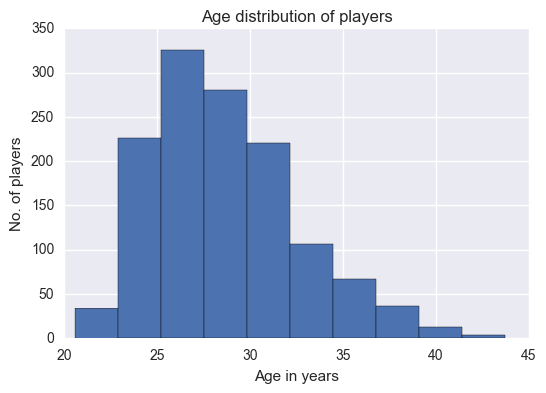

In [43]:
# plotting a histogram of the ages of 2014 players
%matplotlib inline

plt.hist(curr_age_pos['Age'])
plt.title("Age distribution of players")
plt.xlabel("Age in years")
plt.ylabel("No. of players")
plt.show()

Observation and tentative inference:

Histogram above closely aligns with our interpretation before based on the descriptive statistics. The age distribution is positively skewed. Majority of the players are 22 to 32 years old.

In [44]:
# converting all G_ columns to respective ages or NaNs, if value >= 1 then age else NaN,
# to facilitate box plot generation

def conv_bool(val):
    if val >= 1:
        return 1
    else:
        return np.NaN

for i in range(3,15):
    curr_age_pos.iloc[:,i] = curr_age_pos.iloc[:,i].apply(conv_bool)
    curr_age_pos.iloc[:,i] = curr_age_pos.iloc[:,i]*curr_age_pos['Age']
    
curr_age_pos = curr_age_pos.rename(columns = {
    'G_p': 'Pitcher',
    'G_c': 'Catcher',
    'G_1b': '1st_baseman',
    'G_2b': '2nd_baseman',
    'G_3b': '3rd_baseman',
    'G_ss': 'Short_stop',
    'G_lf': 'left_fielder',
    'G_rf': 'right_fielder',
    'G_cf': 'center_fielder',
    'G_dh': 'designated_hitter',
    'G_ph': 'pinch_hitter',
    'G_pr': 'pinch_runner'
})

print(curr_age_pos.head())

    playerID  finalGame  yearID  Pitcher  Catcher  1st_baseman  2nd_baseman  \
0   abadfe01 2014-09-27    2014     28.8      NaN          NaN          NaN   
1  abreubo01 2014-09-28    2014      NaN      NaN          NaN          NaN   
2  abreujo02 2014-09-27    2014      NaN      NaN         27.7          NaN   
3  abreuto01 2014-07-28    2014      NaN      NaN          NaN         29.7   
4  aceveal01 2014-06-02    2014     31.5      NaN          NaN          NaN   

   3rd_baseman  Short_stop  left_fielder  center_fielder  right_fielder  \
0          NaN         NaN           NaN             NaN            NaN   
1          NaN         NaN          40.6             NaN           40.6   
2          NaN         NaN           NaN             NaN            NaN   
3         29.7         NaN           NaN             NaN            NaN   
4          NaN         NaN           NaN             NaN            NaN   

   designated_hitter  pinch_hitter  pinch_runner  birthDate   Age  
0     

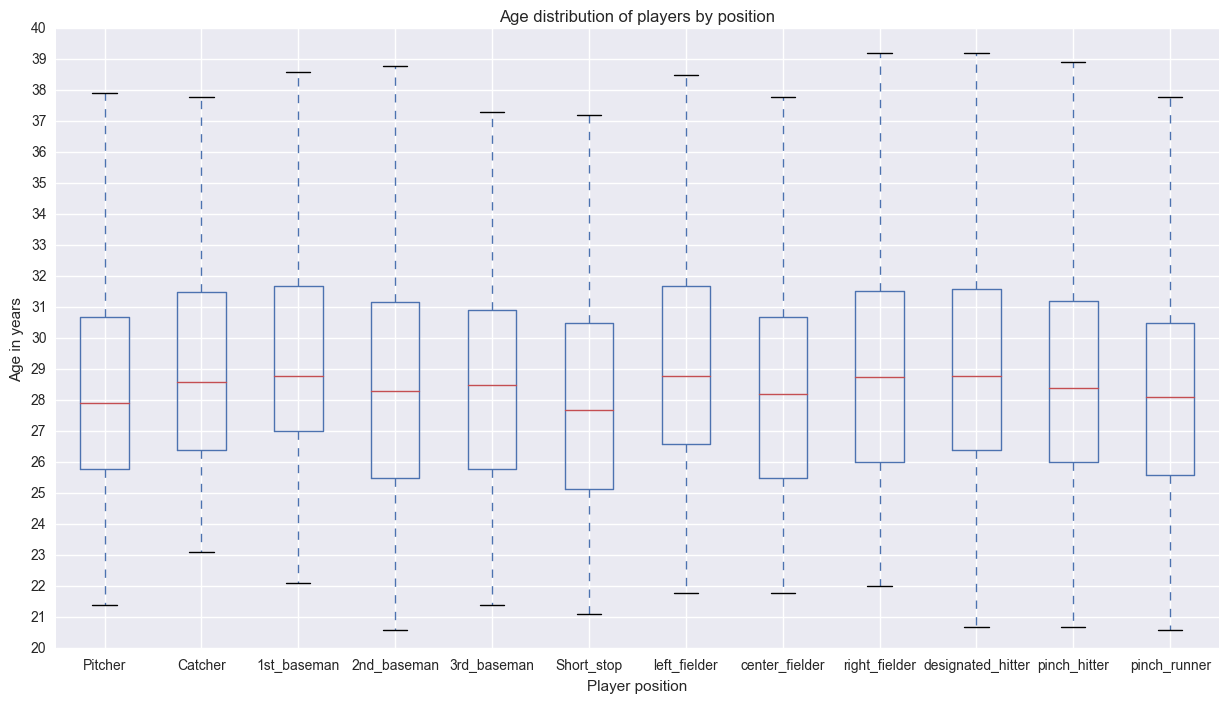

In [45]:
# Creating box plots of the ages by position

fig, ax = plt.subplots(figsize = (15,8))
ax.set_ylim(20,40)
plt.yticks(np.arange(20,41,1))
curr_age_pos.iloc[:,3:15].boxplot()
plt.title("Age distribution of players by position")
plt.xlabel("Player position")
plt.ylabel("Age in years")
plt.show()

Obeservation and tenative inference: 

Looking at the median and spread, the youngest players play at the short stop position. Closely behind short stops are pitchers, who are the second youngest. 

It's a much closer contest for older players. First basemen probably win, with left fielders, designated hitters and right fielders tied up for the second spot.

### Question 2: Do right hand pitchers perform better than left hand pitchers - higher strikeouts per 9 innings, lower walks and hits per 9 innings, higher win-loss ratio?

In [46]:
# grouping pitch_hand_perf df by throws column
pitch_hand_perf_group = pitch_hand_perf.groupby('throws').sum()
pitch_hand_perf_group

,W,L,IPouts,H,BB,SO
throws,,,,,,
L,54139,53861,2917877,973099,356403,554291
R,152056,151903,8172204,2735890,952850,1452543


In [47]:
# computing strikeouts per 9 innings
pitch_hand_perf_group['SOs per 9INs'] = pitch_hand_perf_group['SO']/ (pitch_hand_perf_group['IPouts']/ 3/ 9)
pitch_hand_perf_group = pitch_hand_perf_group.drop('SO', axis='columns')
pitch_hand_perf_group

,W,L,IPouts,H,BB,SOs per 9INs
throws,,,,,,
L,54139,53861,2917877,973099,356403,5.129023
R,152056,151903,8172204,2735890,952850,4.799031


In [48]:
# computing hits plus walks per 9 innings
pitch_hand_perf_group['Hs + Ws per 9INs'] = (pitch_hand_perf_group['H'] + pitch_hand_perf_group['BB']) \
/ (pitch_hand_perf_group['IPouts']/ 3/ 9)
pitch_hand_perf_group = pitch_hand_perf_group.drop(['IPouts','H','BB'], axis='columns')
pitch_hand_perf_group

,W,L,SOs per 9INs,Hs + Ws per 9INs
throws,,,,
L,54139,53861,5.129023,12.302285
R,152056,151903,4.799031,12.187163


In [49]:
# computing W-L ratio
pitch_hand_perf_group['W-L Ratio'] = pitch_hand_perf_group['W']/ pitch_hand_perf_group['L']
pitch_hand_perf_group = pitch_hand_perf_group.drop(['W','L'], axis='columns')
pitch_hand_perf_group

,SOs per 9INs,Hs + Ws per 9INs,W-L Ratio
throws,,,
L,5.129023,12.302285,1.005161
R,4.799031,12.187163,1.001007


Observation and tentative inference:

Based on the above table, it seems like left hand pitchers perform marginally better than right hand pitchers, especially on the strikeouts per 9 innings metric.

### Question 3: How many total homeruns were made every season? Who were the top five players with the most number of homeruns in any given season?

In [50]:
# computing total homeruns made in every season
homeruns_year = homeruns.groupby('yearID', as_index=False).sum()
homeruns_year.head()

,yearID,HR
0,1871,47
1,1872,35
2,1873,46
3,1874,40
4,1875,40


In [51]:
# computing the descriptive statistics for Home Runs made per season
homeruns_year['HR'].describe()

count     144.000000
mean     1935.854167
std      1641.336246
min        23.000000
25%       458.750000
50%      1437.500000
75%      3090.750000
max      5693.000000
Name: HR, dtype: float64

Observations and tentative inference:

The mean of home runs made per season is ~1936 and the median is ~1438. The home runs per season range from 23 to 5693.

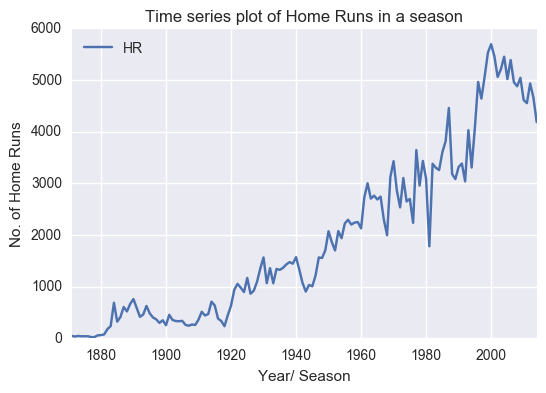

In [52]:
# visualizing the home runs made in every season as a time series plot
homeruns_year.plot('yearID','HR')
plt.title("Time series plot of Home Runs in a season")
plt.xlabel("Year/ Season")
plt.ylabel("No. of Home Runs")
plt.show()

Observations and tentative inference:

Clearly the no. of homeruns per season has been on an upward trend since the inception of MLB, with a noticeable peak at the end of the 20th century.

In [53]:
# top five players with the highest no. of homeruns made in any given season
homeruns_player = homeruns.groupby(['yearID','playerID','nameFirst','nameLast','nameGiven'], as_index=False).sum()
homeruns_player = homeruns_player.sort_values('HR', ascending=False)
homeruns_player.head()

,yearID,playerID,nameFirst,nameLast,nameGiven,HR
70380,2001,bondsba01,Barry,Bonds,Barry Lamar,73
67464,1998,mcgwima01,Mark,McGwire,Mark David,70
67751,1998,sosasa01,Sammy,Sosa,Samuel Peralta,66
68582,1999,mcgwima01,Mark,McGwire,Mark David,65
71309,2001,sosasa01,Sammy,Sosa,Samuel Peralta,64


### Question 4: List the top ten currently active franchises with the highest average win percentage per season, or the most number of world series wins? Is there a correlation between a franchises' average win percentage and the number of world series they've won?

In [54]:
# computing average win percentage per season and identifying 10 franchises with highest win percentage
teams_franchises_group1 = teams_franchises.groupby(['yearID','franchName'], as_index=False).sum()
teams_franchises_group1['Win_Perc'] = (teams_franchises_group1['W']/ teams_franchises_group1['G'] * 100).round(2)
teams_franchises_group1 = teams_franchises_group1.drop(['G','W'], axis='columns')
teams_franchises_group1 = teams_franchises_group1.groupby('franchName',as_index=False) \
['Win_Perc'].mean().round(2)
teams_franchises_group1 = teams_franchises_group1.sort_values('Win_Perc', ascending=False).reset_index(drop=True)
teams_franchises_group1.head(10)

,franchName,Win_Perc
0,New York Yankees,56.42
1,San Francisco Giants,53.40
2,Los Angeles Dodgers,52.06
3,St. Louis Cardinals,51.47
4,Boston Red Sox,51.43
5,Chicago Cubs,51.12
6,Cleveland Indians,50.75
7,Cincinnati Reds,50.66
8,Detroit Tigers,50.54
9,Chicago White Sox,50.20


In [55]:
# World series wins by franchises, 10 franchises with the highest wins
teams_franchises_group2 = teams_franchises[teams_franchises['WSWin']=='Y']. \
groupby('franchName', as_index=False)['WSWin'].count()
teams_franchises_group2 = teams_franchises_group2.sort_values('WSWin',ascending=False).reset_index(drop=True)
teams_franchises_group2.head(10)

,franchName,WSWin
0,New York Yankees,27
1,St. Louis Cardinals,12
2,San Francisco Giants,10
3,Oakland Athletics,9
4,Boston Red Sox,8
5,Los Angeles Dodgers,6
6,Pittsburgh Pirates,5
7,Cincinnati Reds,5
8,Detroit Tigers,4
9,Baltimore Orioles,3


In [56]:
# dataframe to plot the relationship between win percentages and world series wins
teams_franchises_group3 = teams_franchises_group1.merge(teams_franchises_group2,on='franchName',how='left')
teams_franchises_group3['WSWin'] = teams_franchises_group3['WSWin'].fillna(0)
teams_franchises_group3.head()

,franchName,Win_Perc,WSWin
0,New York Yankees,56.42,27.0
1,San Francisco Giants,53.40,10.0
2,Los Angeles Dodgers,52.06,6.0
3,St. Louis Cardinals,51.47,12.0
4,Boston Red Sox,51.43,8.0


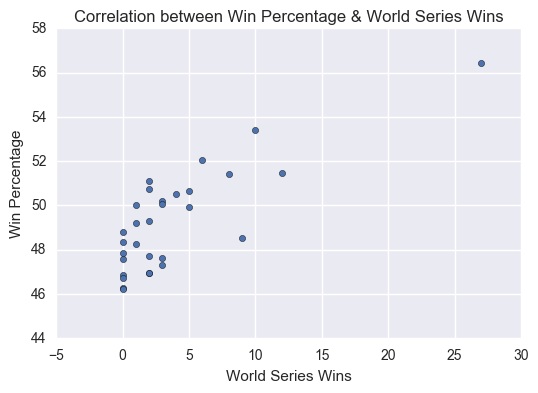

In [57]:
# scatter plot to analyze the correlation between world series wins and win percentages
teams_franchises_group3.plot.scatter('WSWin','Win_Perc')
plt.title("Correlation between Win Percentage & World Series Wins")
plt.xlabel("World Series Wins")
plt.ylabel("Win Percentage")
plt.show()

Observation and tentative inference:

There is a weak positive correlation between the no. of world series wins and average win percentage per season.

### Question 5: What is the correlation between the batting average, on base percentage (OBP), runs batted in (RBI) and homeruns of a batter to his salary? Which of these is more positively correlated?

In [58]:
# computing On Batting Average
batting_salary['BA'] = (batting_salary['H'] / batting_salary['AB'])

In [59]:
# computing On Base Percentage
batting_salary['OBP'] = ((batting_salary['H'] + batting_salary['BB'])/ \
(batting_salary['AB'] + batting_salary['BB'] + batting_salary['HBP'] + batting_salary['SF']))
batting_salary.drop(['AB','H','BB','HBP','SF'], axis='columns', inplace=True)

In [60]:
# grouping data for analysis, filtering players with 5 or more seasons
batting_salary_group1 = batting_salary.groupby('playerID', as_index=False)['yearID'].count()
batting_salary_group2 = batting_salary.groupby('playerID', as_index=False).mean().drop('yearID', axis='columns')
batting_salary_group2 = batting_salary_group2[batting_salary_group1['yearID'] >= 5]
batting_salary_group2.head()

,playerID,RBI,HR,salary,BA,OBP
6,abbotku01,24.200000,6.200000,5.237000e+05,0.251020,0.286629
11,abnersh01,10.666667,1.500000,1.505833e+05,0.212258,0.246419
12,abreubo01,74.888889,15.944444,8.165537e+06,0.285430,0.382908
25,adamste01,0.250000,0.000000,1.369875e+06,0.016410,0.054713
29,affelje01,0.250000,0.000000,2.789125e+06,0.104167,0.178571


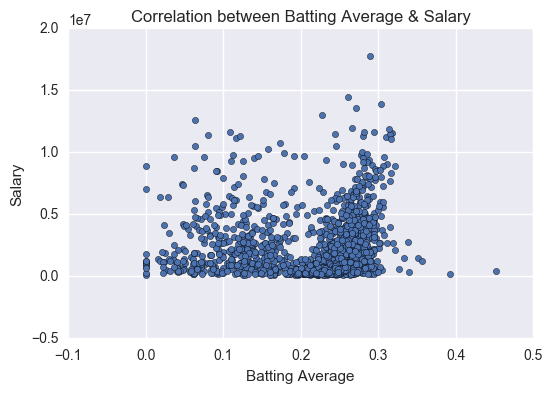

In [61]:
# plotting OBP vs salary
batting_salary_group2.plot.scatter('BA','salary')
plt.title("Correlation between Batting Average & Salary")
plt.xlabel("Batting Average")
plt.ylabel("Salary")
plt.show()

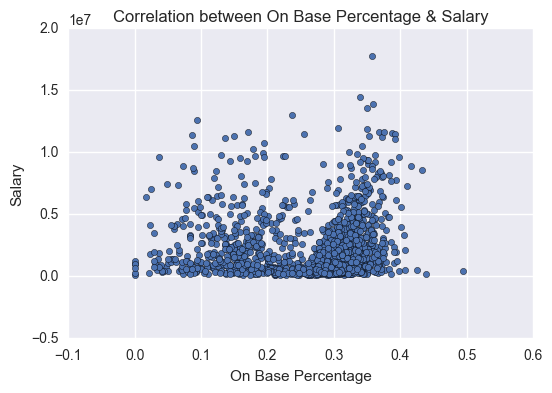

In [62]:
# plotting OBP vs salary
batting_salary_group2.plot.scatter('OBP','salary')
plt.title("Correlation between On Base Percentage & Salary")
plt.xlabel("On Base Percentage")
plt.ylabel("Salary")
plt.show()

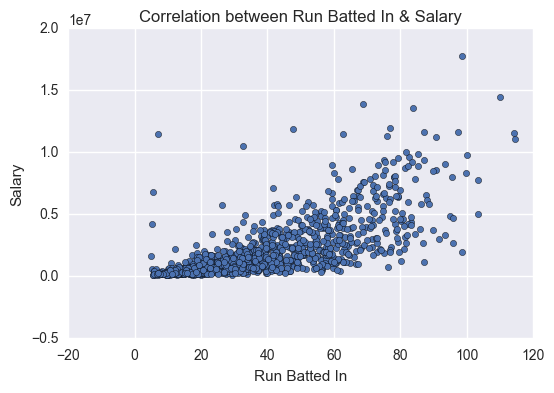

In [63]:
# Plotting RBI vs salary, filtering players with RBI > 5
batting_salary_group2[batting_salary_group2['RBI'] >= 5].plot.scatter('RBI','salary')
plt.title("Correlation between Run Batted In & Salary")
plt.xlabel("Run Batted In")
plt.ylabel("Salary")
plt.show()

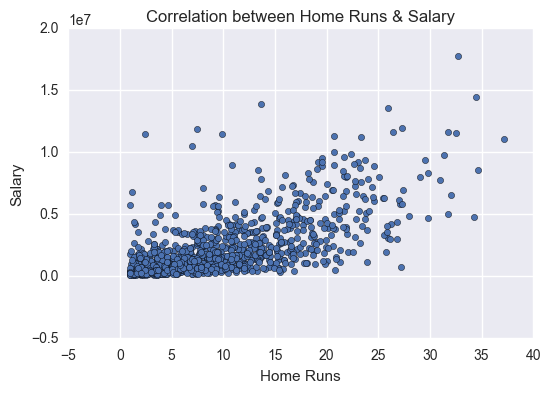

In [64]:
# Plotting Home Runs vs Salary, filtering players with HR gre
batting_salary_group2[batting_salary_group2['HR'] >= 1].plot.scatter('HR','salary')
plt.title("Correlation between Home Runs & Salary")
plt.xlabel("Home Runs")
plt.ylabel("Salary")
plt.show()

Obervations and tentative inference:

There is a weak positive correlation between RBI/ Home Runs and salary. There is no correlation between BA/OBP and salary.

## Conclusions/ Tentative Inferences

Answering the questions that were posed at the start of the analysis below. Please note that these inferences are tentative based on exploratory data analysis and do not mean causation.

* **What is the age distribution of MLB players who played during the 2014 season? Does the age distribution change based on the position they played?**

    The mean age is ~28.5 years, whereas the median is a bit lower ~28 years.
    
    The ages range from ~20.5 to ~43.5 years.
    
    The age distribution is positively skewed. Majority of the players are 22 to 32 years old.
    
    The player's age distribution does change based on the position they play.
    
    The youngest players play at the short stop position. Closely behind short stops are pitchers, who are the second youngest. *However, these are just inferences based on some preliminary descriptive statistics, in order to validate these conclusions we would have to preform hypothesis testing to reject a null hypothesis stating that the mean age of players who play at the short stop position is greater than or equal to the mean ages of other players. Student's t-test might be a good hypothesis test to employ here.*
    
    First basemen are the oldest, with left fielders, designated hitters and right fielders tied up for the second oldest. *Similar to the comment above, these are preliminary inferences which need to be backed up by hypothesis (t-test, again, is a good choice) to reject a null hypothesis - mean age of first basemen is lower than or equal to the mean ages of the rest of the players*
    

* **Do right hand pitchers perform better than left hand pitchers - higher strikeouts per 9 innings, lower walks and hits per 9 innings, higher win-loss ratio?**

    Left hand pitchers perform marginally better than right hand pitchers, especially on the strikeouts per 9 innings metric. *In order to validate this conclusion, we would need to perform a t-test to reject the null hypothesis which should state that the mean of the metrics stated in the question for left hand pitchers is lower than or equal to the mean of the metric of right hand pitchers*
    

* **How many total homeruns were made every season? Who were the top five players with the most number of homeruns in any given season?**

    The mean of home runs made per season is ~1936 and the median is ~1438. The home runs per season range from 23 to 5693.
    
    The no. of homeruns per season has been on an upward trend since the inception of MLB, with a noticeable peak at the end of the 20th century.
    
    Five players with the highest homeruns in a season are:
    
        1. Barry Bonds - 2001
        2. Mark McGwire - 1998
        3. Sammy Sossa - 1998
        4. Mark McGwire - 1999
        5. Sammy Sossa - 2001
    

* **List the top ten currently active franchises with the highest average win percentage per season, or the most number of world series wins? Is there a correlation between a franchises' average win percentage and the number of world series they've won?**

    Ten franchises with the most no. of world series wins are:

        1. New York Yankees
        2. San Francisco Giants
        3. Los Angeles Dodgers
        4. St. Louis Cardinals
        5. Boston Red Sox
        6. Chicago Cubs
        7. Cleveland Indians
        8. Cincinnati Reds
        9. Detroit Tigers
        10. Chicago White Sox

    Ten franchises with the highest average win percentages per season:

        1. New York Yankees
        2. St. Louis Cardinals
        3. San Francisco Giants
        4. Oakland Athletics
        5. Boston Red Sox
        6. Los Angeles Dodgers
        7. Pittsburg Pirates
        8. Cincinnati Reds
        9. Detroit Tigers
        10. Baltimore Orioles
    
    There is a weak positive correlation between the no. of world series wins and average win percentage per season. *Please do remember that correlation does not mean causation.*
    
* **What is the correlation between the batting average, on base percentage (OBP), runs batted in (RBI) and homeruns of a batter to his salary? Which of these is more positively correlated?**

    There is a weak positive correlation between RBI/ Home Runs and salary. There is no correlation between BA/OBP and salary. *Again, caveat here is that correlation does not mean causation!*

## More questions that can be answered from analyzing this dataset

1. What is the distribution of career longevity of baseball players? How does it change based on the position they play?

2. Is there a particularly high concentration of current players within a range of heights and weights?

3. How many shutouts were there every season? Who are the top five players with the most number of shutouts in a season?

4. Is there a correlation between a batter's no. of walks and strikeouts? Who has the highest walks-to-strikeout ratio?

5. Is there a correlation between on base percentage and the player's order of appearance? Who had the highest on-base percentage?

## References

https://en.wikipedia.org/wiki/Baseball_statistics

https://en.wikipedia.org/wiki/Baseball

https://en.wikipedia.org/wiki/Run_batted_in

https://en.wikipedia.org/wiki/Win%E2%80%93loss_record_(pitching)

https://en.wikipedia.org/wiki/On-base_percentage